<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Heart_Failure_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Clinical Records Data Set

Heart failure is a chronic condition where the heart is unable to pump blood effectively to meet the body's needs. It often results from other health issues that weaken or damage the heart muscle, such as coronary artery disease, high blood pressure, or previous heart attacks.

Key Points About Heart Failure:
- Types: There are primarily two types—left-sided (systolic or diastolic) and right-sided heart failure. Left-sided heart failure affects the heart's ability to pump blood out to the body, while right-sided heart failure affects its ability to pump blood to the lungs.

- Symptoms: Common symptoms include shortness of breath, persistent coughing or wheezing, fatigue, swollen legs, ankles, and feet, and rapid or irregular heartbeat.

- Causes: It can be caused by various conditions, including coronary artery disease, high blood pressure, cardiomyopathy, and heart valve disease.

- Management: While it is a serious condition, heart failure can be managed with lifestyle changes, medication, and in some cases, surgical procedures. Key lifestyle changes include reducing salt intake, maintaining a healthy weight, and engaging in regular physical activity.

- Prognosis: With proper management, many people with heart failure can lead a relatively normal life, although it often requires ongoing medical care and monitoring.

# Description
This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

Data Set Characteristics: Multivariate

Number of Instances: 299

Area: Life

Attribute Characteristics: Integer/Real

Number of Attributes: 13

Date Donated 2020-02-05

Associated Tasks: Classification, Clustering, Regression

Missing Values: No

# Columns
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

# Source
http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

In [3]:
!pip install ehrapy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.7 MB/s eta 0:00:00
   

In [4]:
!pip install statsmodels

In [5]:
import warnings
warnings.filterwarnings("ignore")

import ehrapy as ep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Data Load
import ehrapy as ep
adata = ep.dt.heart_failure(encoded=True)

Output()

! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


In [ ]:
ep.ad.infer_feature_types(adata)

! Feature  was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.


 Detected feature types for AnnData object with 299 obs and 13 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ age
║   ╠══ creatinine_phosphokinase
║   ╠══ ejection_fraction
║   ╠══ platelets
║   ╠══ serum_creatinine
║   ╠══ serum_sodium
║   ╚══ time
╚══ 🗂️ Categorical features
    ╠══ DEATH_EVENT (2 categories)
    ╠══ anaemia (2 categories)
    ╠══ diabetes (2 categories)
    ╠══ high_blood_pressure (2 categories)
    ╠══ sex (2 categories)
    ╚══ smoking (2 categories)

In [9]:
#Converting to pandas dataframe
df = ep.ad.anndata_to_df(adata)

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00000,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03125,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00000,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00000,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00000,2.7,116.0,0.0,0.0,8.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float32
 1   anaemia                   299 non-null    float32
 2   creatinine_phosphokinase  299 non-null    float32
 3   diabetes                  299 non-null    float32
 4   ejection_fraction         299 non-null    float32
 5   high_blood_pressure       299 non-null    float32
 6   platelets                 299 non-null    float32
 7   serum_creatinine          299 non-null    float32
 8   serum_sodium              299 non-null    float32
 9   sex                       299 non-null    float32
 10  smoking                   299 non-null    float32
 11  time                      299 non-null    float32
 12  DEATH_EVENT               299 non-null    float32
dtypes: float32(13)
memory usage: 15.3 KB


In [ ]:
variables = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]


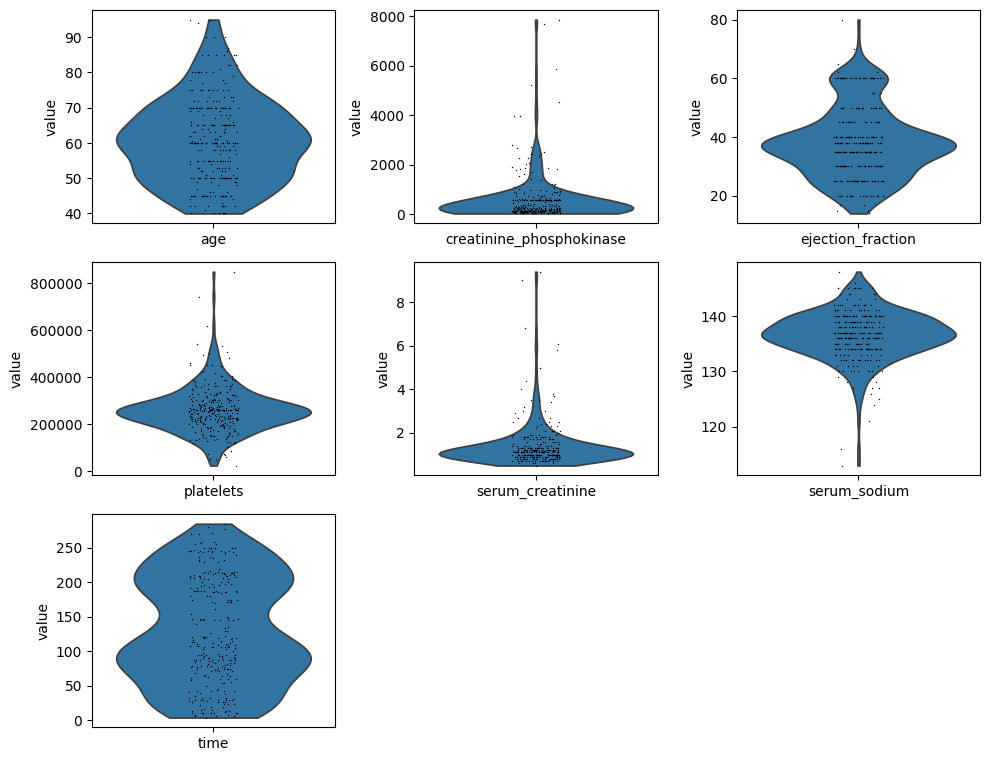

In [ ]:
#Violin Plot
fig = plt.figure(figsize=(10, 10))
for i, variable in enumerate(variables, start=1):
    ax = plt.subplot(4, 3, i)
    ep.pl.violin(adata, keys=variable, ax=ax, show=False)
fig.tight_layout()
plt.show()

# Interpretation of violin plot:
- Age: The distribution of ages is roughly symmetrical, with most values concentrated between 40 and 90.

- Creatinine Phosphokinase: This distribution is highly skewed to the right, with most values concentrated at the lower end and a long tail extending towards higher values, indicating that a few individuals have much higher levels.

- Ejection Fraction: The distribution appears somewhat symmetrical, with most values concentrated between 20 and 80.

- Platelets: The distribution is roughly symmetrical, with most values concentrated between 0 and 800,000.

- Serum Creatinine: This distribution is also highly skewed to the right, with most values concentrated at the lower end and a long tail extending towards higher values, similar to creatinine phosphokinase.

- Serum Sodium: The distribution is somewhat symmetrical, with most values concentrated between 120 and 140.

- Time: The distribution is roughly symmetrical, with most values concentrated between 0 and 250.

# Descriptive Statistics

In [ ]:
def numeric_feature_stats(numeric_feature):
  for col in numeric_feature:
    print('*'*5 , col , '*'*5)
    print(numeric_feature[col].agg(['min','max','mean','median','std','skew','kurtosis']))
    print()

In [ ]:
numeric_feature_stats(df[variables])

***** age *****
min         40.000000
max         95.000000
mean        60.833893
median      60.000000
std         11.894809
skew         0.423062
kurtosis    -0.184870
Name: age, dtype: float64

***** creatinine_phosphokinase *****
min           23.000000
max         7861.000000
mean         581.839478
median       250.000000
std          970.287781
skew           4.463110
kurtosis      25.149046
Name: creatinine_phosphokinase, dtype: float64

***** ejection_fraction *****
min         14.000000
max         80.000000
mean        38.083611
median      38.000000
std         11.834835
skew         0.555383
kurtosis     0.041410
Name: ejection_fraction, dtype: float64

***** platelets *****
min          25100.000000
max         850000.000000
mean        263358.031250
median      262000.000000
std          97804.242188
skew             1.462321
kurtosis         6.209255
Name: platelets, dtype: float64

***** serum_creatinine *****
min          0.500000
max          9.400000
mean         1.

- Age: The age distribution is fairly symmetrical with a slight skew to the right, indicating that most patients are around 60 years old, but there are some older individuals in the dataset.
- Creatinine Phosphokinase (CPK): The CPK levels are highly skewed to the right, indicating the presence of outliers with very high enzyme levels, which suggests that while most patients have lower CPK levels, a few have significantly higher levels.
- Ejection Fraction: The ejection fraction values are slightly skewed to the right with a relatively uniform distribution, meaning there's a range of ejection fraction values among patients.
- Platelets: The platelet counts are skewed to the right with some high outliers, suggesting a majority of patients have platelet counts around 263,000, but a few have much higher values.
- Serum Creatinine: The serum creatinine levels are highly skewed to the right, indicating that while most patients have lower creatinine levels, some patients have significantly higher values, which could indicate kidney dysfunction.
- Serum Sodium: The serum sodium levels are slightly negatively skewed, indicating a concentration around 136-137 mmol/L, with some lower values.
- Time: The follow-up time is fairly symmetrically distributed with some variability, indicating a range of follow-up durations for the patients.


# Bivarient Analysis

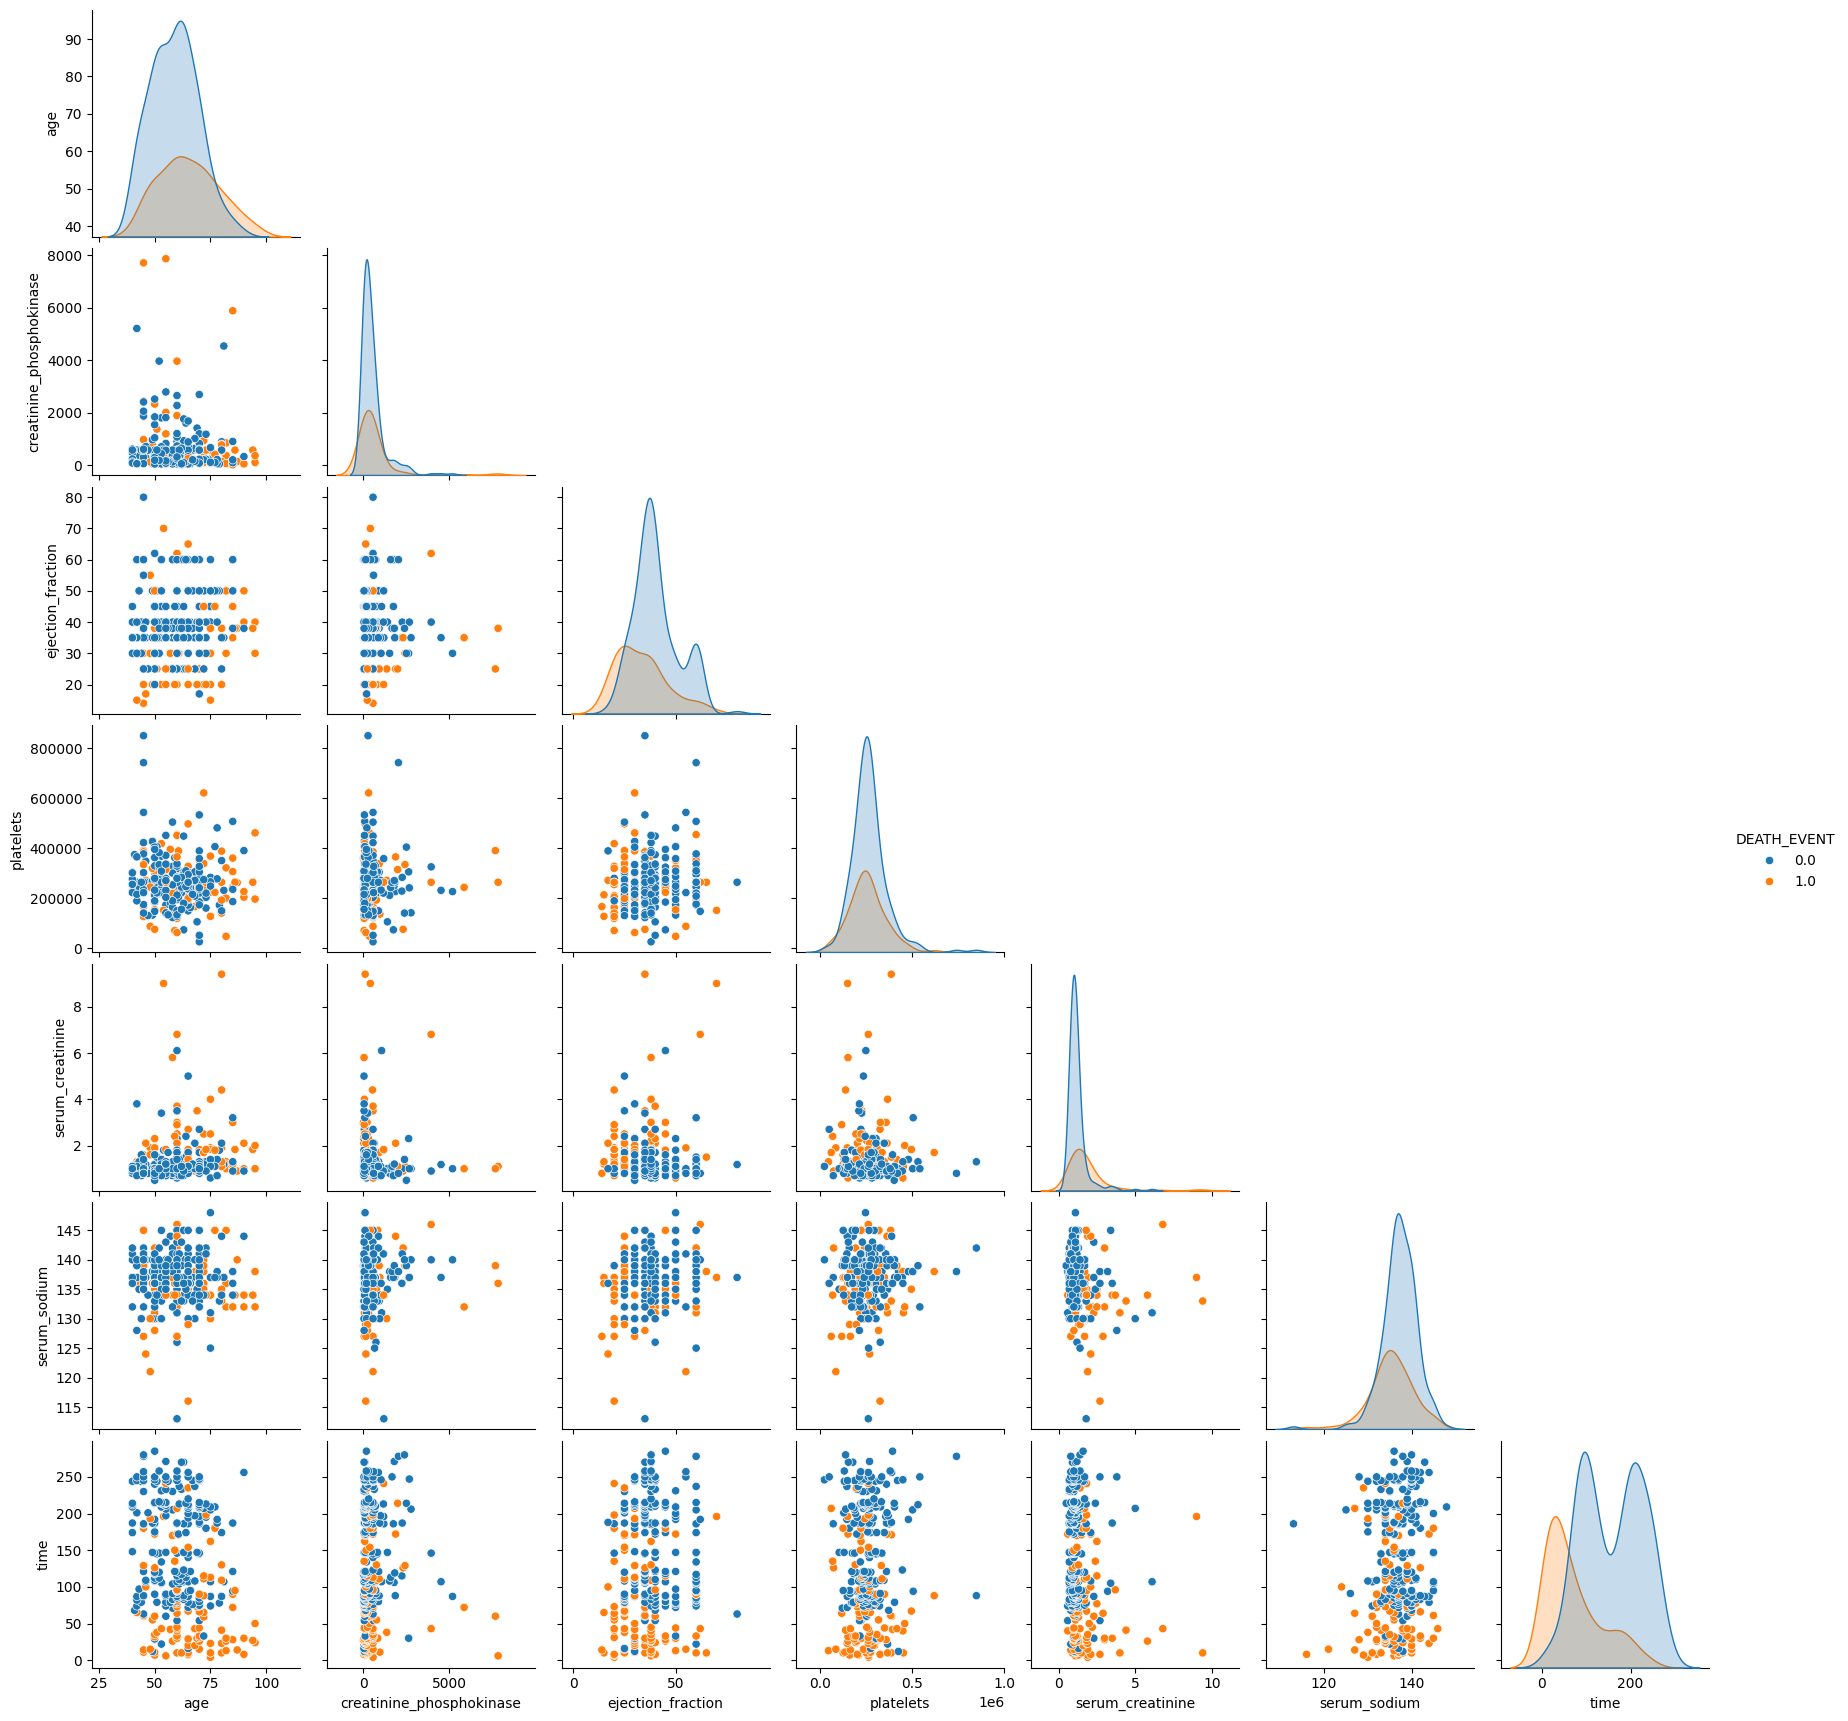

In [ ]:
import numpy as np
g = sns.pairplot(
    df,
    vars=variables,
    hue="DEATH_EVENT",
)

# hide the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

# change back to our preferred style
plt.style.use("ggplot")

#Diagonal Plots
The diagonal plots represent the distribution of each variable:

- Age: The age distribution shows a concentration around middle to older ages, with no significant difference between the death event classes.

- Creatinine Phosphokinase: This distribution is heavily right-skewed, indicating some patients have very high levels of this enzyme.

- Ejection Fraction: This variable appears more uniformly distributed, with lower values possibly associated with higher death rates.

- Platelets: Shows a fairly uniform distribution with some high outliers.

- Serum Creatinine: Also right-skewed, with higher values potentially linked to higher death rates.

- Serum Sodium: Shows a nearly normal distribution.

- Time: Represents follow-up time, with varied durations.

# Off-Diagonal Plots
These plots show the relationships between pairs of variables, color-coded by "DEATH_EVENT":

- Age vs. Serum Creatinine: Older age and higher serum creatinine levels might correlate with a higher probability of death.

- Ejection Fraction vs. Serum Creatinine: Lower ejection fractions combined with higher serum creatinine levels seem associated with higher death rates.

- Platelets vs. Creatinine Phosphokinase: No clear pattern between platelets and CPK levels, but outliers might be interesting to investigate.

- Serum Sodium vs. Age: No clear distinction, suggesting that sodium levels are relatively independent of age concerning death events.

- Time vs. Age: Shows follow-up time distribution across different age groups. Longer follow-ups seem spread across age ranges, but deaths might cluster in specific age groups.

- Detailed Variable Insights
Age: Examine whether older patients are at higher risk by studying age distributions and their relationship with other variables.

- Creatinine Phosphokinase: Investigate high CPK levels as potential indicators of muscle damage or severe heart conditions.

- Ejection Fraction: Focus on low ejection fraction values, as these are critical indicators of heart failure severity.

- Platelets: Review platelet counts for irregularities and potential associations with clotting disorders.

- Serum Creatinine: Monitor high creatinine levels for potential kidney dysfunction, which can be a critical factor in heart failure.

- Serum Sodium: Look at sodium levels in conjunction with other electrolytes to assess fluid balance and related complications.

- Time: Use follow-up duration to understand patient survival rates and the effectiveness of treatments over time.

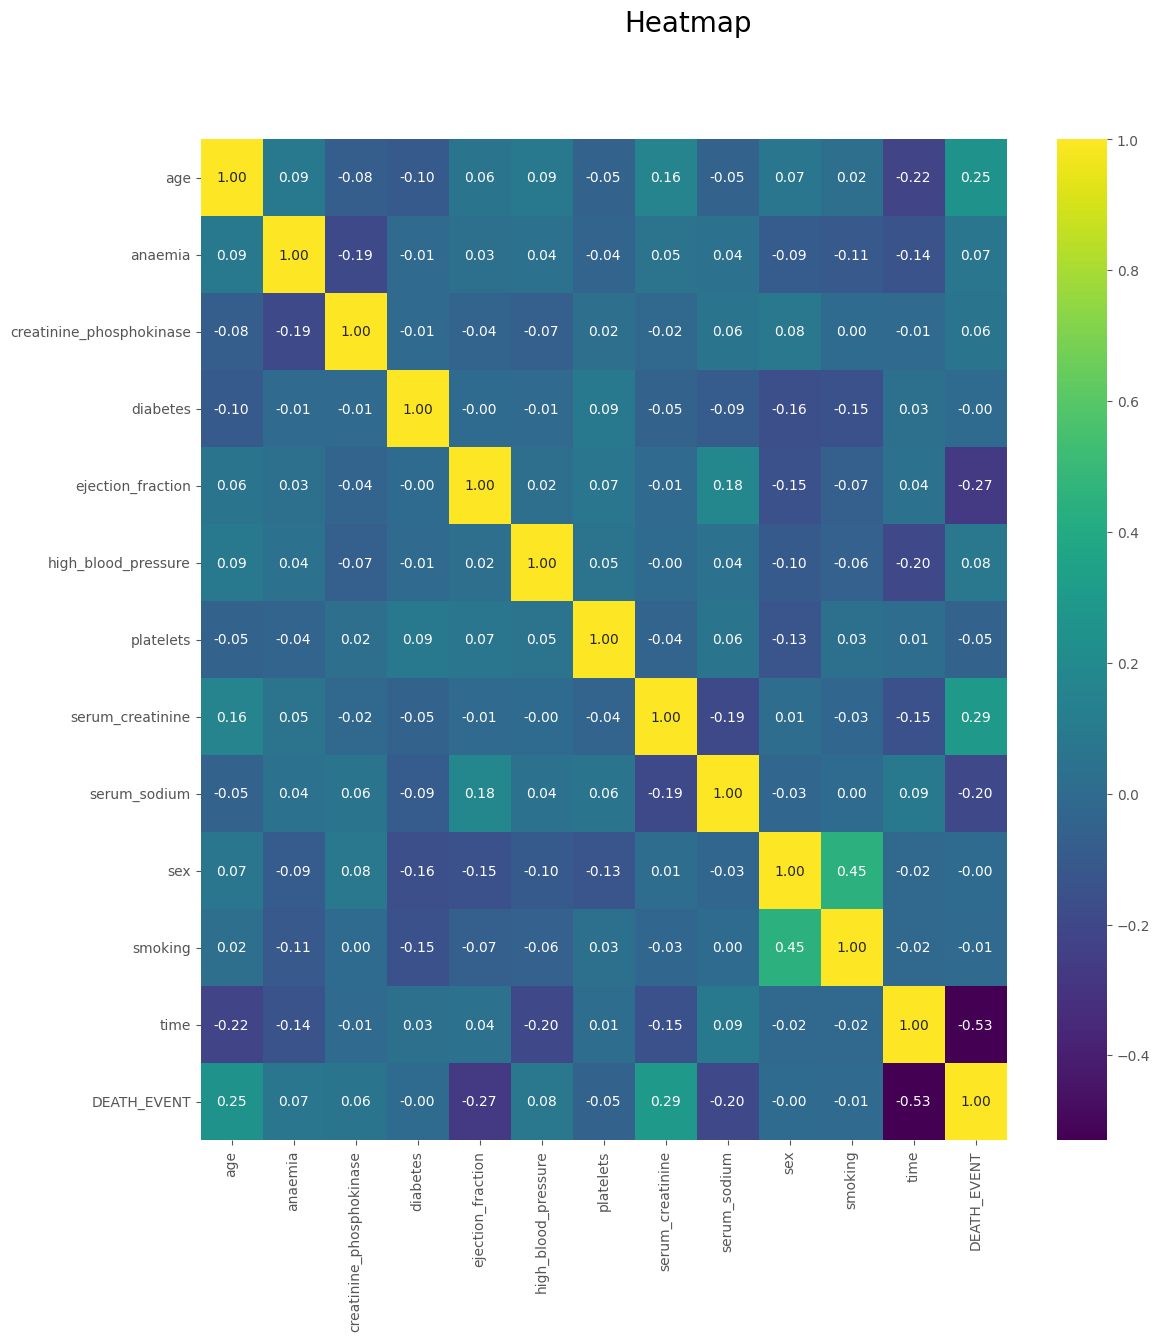

In [ ]:
f,ax = plt.subplots(figsize=(13,13))
corr= df.corr()
hm=sns.heatmap(round(corr,2),annot=True,cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)

# Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind

# Split the data based on the target variable
death_event = df[df['DEATH_EVENT'] == 1]['serum_creatinine']
no_death_event = df[df['DEATH_EVENT'] == 0]['serum_creatinine']

# Perform a t-test
t_stat, p_value = ttest_ind(death_event, no_death_event)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 5.306458914858361, P-value: 2.1901834312835425e-07


Interpreting the T-Test Results:
T-statistic: 5.306458914858361

This value measures the difference in means relative to the variability in the data. A higher t-statistic indicates a greater difference between the two groups.

P-value: 2.1901834312835425e-07

This very small p-value (much less than 0.05) suggests that the observed difference in serum creatinine levels between the two groups is statistically significant. We can reject the null hypothesis that there is no difference in serum creatinine levels between patients who experienced a death event and those who did not.

In [ ]:
from scipy.stats import ttest_ind

# Split the data based on the target variable
death_event = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase']
no_death_event = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase']

# Perform a t-test
t_stat, p_value = ttest_ind(death_event, no_death_event)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
ejection_fraction

T-statistic: 1.083170735114864, P-value: 0.27961122186209536


Interpreting the T-Test Results:
T-statistic: 1.083170735114864

This value measures the difference in means relative to the variability in the data. A lower t-statistic close to 0 suggests less difference between the two groups.

P-value: 0.27961122186209536

This p-value is greater than the common significance level of 0.05, indicating that the observed difference in CPK levels between the two groups is not statistically significant. We fail to reject the null hypothesis that there is no difference in CPK levels between patients who experienced a death event and those who did not.

In [ ]:
from scipy.stats import ttest_ind

# Split the data based on the target variable
death_event = df[df['DEATH_EVENT'] == 1]['ejection_fraction']
no_death_event = df[df['DEATH_EVENT'] == 0]['ejection_fraction']

# Perform a t-test
t_stat, p_value = ttest_ind(death_event, no_death_event)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -4.805628467960246, P-value: 2.452895148334129e-06


Interpreting the T-Test Results:
T-statistic: -4.805628467960246

This negative t-statistic indicates that the mean ejection fraction for the group that experienced a death event is significantly lower than that of the group that did not.

P-value: 2.452895148334129e-06

This extremely small p-value (much less than 0.05) suggests that the observed difference in ejection fraction levels between the two groups is statistically significant. We can reject the null hypothesis that there is no difference in ejection fraction levels between patients who experienced a death event and those who did not.

# Feature Importance

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the features
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Logistic Regression using statsmodels
log_reg = sm.Logit(y_train, X_train_scaled)
result = log_reg.fit()

# Summary of the model
print(result.summary())

# Predict and evaluate
y_pred = result.predict(X_test_scaled)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Optimization terminated successfully.
         Current function value: 0.325504
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                           13
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.4649
Time:                        12:44:03   Log-Likelihood:                -77.796
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 1.915e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7233      0.268     -6.422      0.000      -2.249      -1.197
x1             0.7291      0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                          Importance
time                        0.346731
serum_creatinine            0.147933
ejection_fraction           0.117478
age                         0.084810
platelets                   0.075426
creatinine_phosphokinase    0.068392
serum_sodium                0.054167
Cluster                     0.049319
anaemia                     0.012720
sex                         0.011632
smoking                     0.011260
high_blood_pressure         0.010212
diabetes                    0.009920


The logistic regression analysis indicated that serum creatinine and ejection fraction are significant predictors of death events in heart failure patients, with higher serum creatinine and lower ejection fraction being associated with a higher risk of death. The random forest model further confirmed the importance of these variables, along with age and time (follow-up period), as critical factors influencing patient outcomes.


# ML Model

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [10]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

Classification Pipeline

In [ ]:
# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification algorithms
classification_algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Classifier', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Define hyperparameters for tuning each algorithm
clf_param_grid = [
    {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
]

# Find the best model for classification
best_clf_models = []
for (name, clf), param_grid in zip(classification_algorithms, clf_param_grid):
    clf_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_clf, y_train_clf)
    best_clf_models.append((name, grid_search.best_estimator_))
    print(f"Best {name} Model:\n", grid_search.best_estimator_)
    y_pred_clf = grid_search.best_estimator_.predict(X_test_clf)
    print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))


Best Logistic Regression Model:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1, solver='liblinear'))])
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86        35
         1.0       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

Best Random Forest Model:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=10))])
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.94      0.81        35
         1.0       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        6

- Logistic Regression
Pipeline: Includes StandardScaler and LogisticRegression with C=1 and solver='liblinear'.

Performance:

Accuracy: 82%

Class 0: High precision (0.77) and recall (0.97), f1-score of 0.86.

Class 1: High precision (0.94) but lower recall (0.60), f1-score of 0.73.

Summary: Good overall performance with a slight bias towards classifying Class 0 more accurately than Class 1.

- Random Forest
Pipeline: Includes StandardScaler and RandomForestClassifier with max_depth=10.

Performance:

Accuracy: 75%

Class 0: Moderate precision (0.72) and high recall (0.94), f1-score of 0.81.

Class 1: High precision (0.86) but lower recall (0.48), f1-score of 0.62.

Summary: Slightly lower accuracy, with a tendency to classify Class 0 more effectively than Class 1.

- Support Vector Classifier (SVC)
Pipeline: Includes StandardScaler and SVC with C=1 and kernel='linear'.

Performance:

Accuracy: 80%

Class 0: High precision (0.77) and high recall (0.94), f1-score of 0.85.

Class 1: High precision (0.88) but lower recall (0.60), f1-score of 0.71.

Summary: High accuracy, good balance between precision and recall for both classes but slightly favors Class 0.

- K-Nearest Neighbors (KNN)
Pipeline: Includes StandardScaler and KNeighborsClassifier with n_neighbors=7.

Performance:

Accuracy: 68%

Class 0: Moderate precision (0.65) and high recall (1.00), f1-score of 0.79.

Class 1: Perfect precision (1.00) but very low recall (0.24), f1-score of 0.39.

Summary: Lowest overall accuracy. Very good at identifying Class 0 but struggles significantly with Class 1.

General Interpretation
- Logistic Regression and SVC perform the best overall, with Logistic Regression having slightly higher accuracy.

- Random Forest has good precision but struggles with recall for Class 1.

- KNN is the least accurate, indicating poor balance and difficulty in correctly classifying Class 1.

Logistic Regression and SVC might be preferable if balanced performance for both classes is desired. However, tuning and further evaluation based on your specific use case would be beneficial.

Clustering Pipeline

Best Clustering Model:
 Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clustering',
                 KMeans(init='random', max_iter=600, n_clusters=5))])


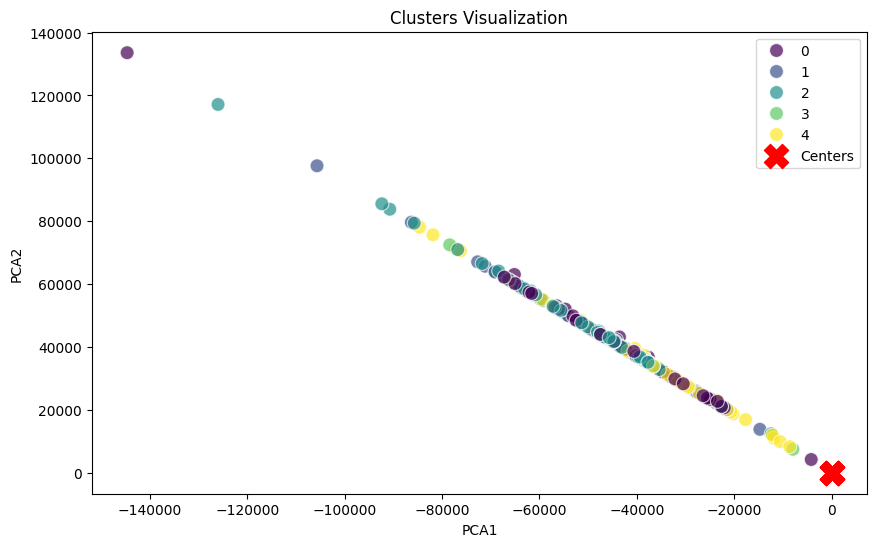

In [13]:

# Create a clustering pipeline
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clustering', KMeans())
])

# Define hyperparameters for tuning
cluster_param_grid = {
    'clustering__n_clusters': [2, 3, 4, 5],
    'clustering__init': ['k-means++', 'random'],
    'clustering__max_iter': [300, 600, 900]
}

# Perform grid search for hyperparameter tuning
cluster_grid_search = GridSearchCV(cluster_pipeline, cluster_param_grid, cv=5)
cluster_grid_search.fit(X)

# Evaluate the best clustering model
best_cluster_model = cluster_grid_search.best_estimator_
print("Best Clustering Model:\n", best_cluster_model)
clusters = best_cluster_model.predict(X)
cluster_centers = best_cluster_model.named_steps['clustering'].cluster_centers_

# Add cluster labels to the original data
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Cluster'] = clusters

# Get PCA-transformed data for visualization
pca_data = best_cluster_model.named_steps['pca'].transform(X)

# Create a DataFrame for PCA data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centers', marker='X')
plt.title('Clusters Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [11]:
# Create a clustering pipeline
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clustering', KMeans())
])

# Define hyperparameters for tuning
cluster_param_grid = {
    'clustering__n_clusters': [2, 3, 4, 5],
    'clustering__init': ['k-means++', 'random'],
    'clustering__max_iter': [300, 600, 900]
}

# Perform grid search for hyperparameter tuning
cluster_grid_search = GridSearchCV(cluster_pipeline, cluster_param_grid, cv=5)
cluster_grid_search.fit(X)

# Evaluate the best clustering model
best_cluster_model = cluster_grid_search.best_estimator_
print("Best Clustering Model:\n", best_cluster_model)
clusters = best_cluster_model.predict(X)
df['Cluster'] = clusters
print("Cluster Centers:\n", best_cluster_model.named_steps['clustering'].cluster_centers_)


Best Clustering Model:
 Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clustering',
                 KMeans(init='random', max_iter=600, n_clusters=5))])
Cluster Centers:
 [[ 0.25672916 -2.3178132 ]
 [ 1.1303214  -0.31553653]
 [ 1.0516025   1.2716568 ]
 [-1.3445265  -0.64100915]
 [-1.0540686   1.0997113 ]]


Cluster Centers
The cluster centers are the central points of the 5 clusters in the 2-dimensional space defined by PCA. These centers represent the "mean" location of all points in their respective clusters.

Clustering Objective: The KMeans algorithm minimizes the variance within each cluster, making data points within a cluster as similar as possible while maximizing the variance between clusters.

Regression Pipeline

In [ ]:
# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression algorithms
regression_algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regressor', SVR()),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor())
]

# Define hyperparameters for tuning each algorithm
reg_param_grid = [
    {
        'regressor__fit_intercept': [True, False]
    },
    {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30]
    },
    {
        'regressor__C': [0.1, 1, 10],
        'regressor__kernel': ['linear', 'rbf']
    },
    {
        'regressor__n_neighbors': [3, 5, 7],
        'regressor__weights': ['uniform', 'distance']
    }
]

# Find the best model for regression
best_reg_models = []
for (name, reg), param_grid in zip(regression_algorithms, reg_param_grid):
    reg_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', reg)
    ])
    grid_search = GridSearchCV(reg_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_reg_models.append((name, grid_search.best_estimator_))
    print(f"Best {name} Model:\n", grid_search.best_estimator_)
    y_pred_reg = grid_search.best_estimator_.predict(X_test_reg)
    print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))


Best Linear Regression Model:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
Mean Squared Error: 0.17868811
Best Random Forest Model:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(n_estimators=50))])
Mean Squared Error: 0.21177333333333334
Best Support Vector Regressor Model:
 Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SVR(C=1))])
Mean Squared Error: 0.2027241580275328
Best K-Nearest Neighbors Regressor Model:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(n_neighbors=7))])
Mean Squared Error: 0.23367348


1. Linear Regression:

- Pipeline: Includes StandardScaler for standardizing data and LinearRegression for the regression task.

- Mean Squared Error (MSE): 0.17868811

- Interpretation: Linear Regression has the lowest MSE among the models, indicating the best fit to the data with minimal prediction errors. This suggests that a linear relationship between the features and the target variable is well-captured by this model.

2. Random Forest Regressor:

- Pipeline: Includes StandardScaler for standardizing data and RandomForestRegressor with n_estimators=50.

- Mean Squared Error (MSE): 0.21177333333333334

- Interpretation: The Random Forest model has a higher MSE compared to Linear Regression, indicating more prediction errors. Random Forest can capture non-linear relationships and interactions between features, but in this case, it seems that it did not perform as well as the linear model.

3. Support Vector Regressor (SVR):

- Pipeline: Includes StandardScaler for standardizing data and SVR with C=1.

- Mean Squared Error (MSE): 0.2027241580275328

- Interpretation: The SVR has a lower MSE than the Random Forest model but higher than the Linear Regression model. This suggests that SVR can capture some of the non-linearities in the data, but not as effectively as the linear model in this particular case.

4. K-Nearest Neighbors Regressor (KNN):

- Pipeline: Includes StandardScaler for standardizing data and KNeighborsRegressor with n_neighbors=7.

- Mean Squared Error (MSE): 0.23367348

- Interpretation: The KNN model has the highest MSE, indicating the poorest performance among the four models. This means that KNN has higher prediction errors and may not be the best choice for this dataset.

Overall Interpretation:
- Linear Regression shows the best performance with the lowest MSE, suggesting it is the most suitable model for your data based on the current evaluation.

- Random Forest and SVR capture non-linear relationships but do not outperform the linear model in this case.

- KNN performs the worst, indicating it may not be suitable for this dataset.

In [ ]:
best_models = {
    'Classification': best_clf_models,
    'Clustering': best_cluster_model,
    'Regression': best_reg_models
}

# Display the best models
for model_type, models in best_models.items():
    print(f"Best {model_type} Models:")
    if isinstance(models, list):
        for name, model in models:
            print(f"  {name}: {model}")
    else:
        print(f"  {models}")


Best Classification Models:
  Logistic Regression: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1, solver='liblinear'))])
  Random Forest: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=10))])
  Support Vector Classifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])
  K-Nearest Neighbors: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])
Best Clustering Models:
  Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clustering', KMeans(init='random', n_clusters=5))])
Best Regression Models:
  Linear Regression: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
  Random Forest: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomFor